# 02 - Simple Linear Regression

In [67]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


# Hypothesis and Cost
### Hypothesis
$$ H(x) = Wx + b $$

### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [68]:
x_data = [1, 2, 3, 4, 5] # Input
y_data = [1, 2, 3, 4, 5] # Output

(0.0, 8.0)

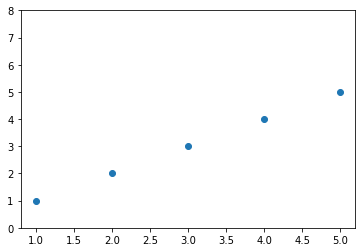

In [69]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## Hypothesis

In [70]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

위의 준비된 데이터의 input, output을 동일하게 한 이유는 x, y 값이 같으면 위의 H(x) = Wx + b의 W, b의 값을 예측해볼 수 있기 때문이다.(공부하는 입장이니깐) <br>
입력과 출력값이 같으려면 W = 1, b = 0가 되어야 한다고 우리는 예측할 수 있다.<br>
이렇게 예측을 해두고 나중에 실제로 W = 1, b = 0이 실제로 나오는지 확인해보자

In [71]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

W = 2.9, b = 0.5로 초기값을 지정하였다. 해당 초기값은 임의의 값을 지정할 수 있고 실제로 이후에 진행할 때 보면 W, b의 값은 초기에 렌덤 값으로 부여한다.

In [72]:
# hypothesis = W * x + b
hypothesis = W * x_data + b

In [73]:
W.numpy(), b.numpy()

(2.9, 0.5)

In [74]:
hypothesis.numpy()

array([ 3.4     ,  6.3     ,  9.200001, 12.1     , 15.      ],
      dtype=float32)

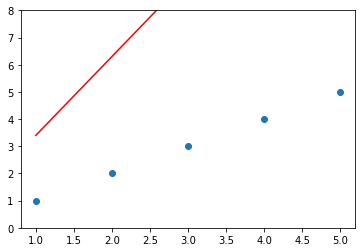

In [75]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Cost

In [76]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

위의 cost function은 error (hypothesis - y_data, 우리의 가설 - 실제 데이터) 제곱(tf.square)의 평균(tf.reduce_mean)으로 우리는 정의하였다.<br>

In [77]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

여기서 reduce는 MapReduce의 reduce라고 하는데 어려운 내용이라서 강의에선 뒤로 skip <br>

일단 간단하게 말해서 reduce는 차원이 줄어든다. 차원 즉 랭크가 줄어들면서 mean을 구한다고 해서 앞에 reduce라는 말이 붙었다고 한다.<br>

위의 코드에서 v의 차원. 즉, 랭크는 1차원이다. 이 1차원을 reduce_mean() 해서 나온 결과는 2.5. 즉, 0차원이 된것이다.

In [78]:
# square은 넘겨 받은 값을 제곱하는 함수
tf.square(3) # 9

<tf.Tensor: shape=(), dtype=int32, numpy=9>

이렇게 tenserflow 함수를 이용해서 cost 함수를 정의해보았다.<br>

## Gradient descent(경사 하강법)

cost가 최소가 되도록 하는 W, b를 찾는 Minimization 알고리즘이 여러 가지 존재한다. <br>
그리고 그 중에서 가장 유명한 것이 Gradient descent이다. <br>
결국 이 Gredient descent는 cost를 minimize하게 하는 W, b를 찾는 알고리즘인 것이다.

In [79]:
# learning_rate initialize -4)
learning_rate = 0.01

# Gradient descent
with tf.GradientTape() as tape: # -1)
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W, b]) # -2)

W.assign_sub(learning_rate * W_grad) # -3)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

1) <br>
Gredient descent는 tensorflow의 GradientTape을 갖고 구현한다. GradientTape은 보통 with 구문이랑 많이 사용한다. <br>
with 구문안에 있는 코드는 변수들의 변화. 즉,정보를 Tape에 기록한다.<br>
그리고 이 Tape에 기록된 변수에 대한 정보를 Tape의 gradient 메소드를 호출하여 경사도 값. 즉, 미분 값을 구한다.<br>

2)<br>
이 gradient 함수는 이 함수에 대해서 변수들에 대한 개별 미분 값. 즉 기울기 값을 구해서 튜플로 반환을 한다.<br>
여기서 미분값은 기울기를 의미한다.<br>

3)<br>
그리고 나서 W, b 값을 업데이트 해준다. <br>
assign_sub 함수는 경사도를 계산한 값을 다시 할당해주는 즉 파이썬에서 -= 과 같은 역할을 해준다.<br>

4) 
learning_rate 는 이 gradient 값을 얼마만큼 반영할 것인지를 결정한다.<br>
주로 이 learning_rate는 굉장히 작은 값을 사용한다. 보통은 0.001, 0.00001과 같은 매우 작은 값을 사용한다. 


**여기까지가 한 걸음 경사를 내려왔다고 생각하면 될것이다. W, b가 한번 업데이트 된 것이다.<br>
이 작업을 한번만 실행하는 것이 아닌 여러 차례 거쳐서 W, b를 업데이트하게 된다.**


** with문에 대한 설명 - https://s-y-130.tistory.com/20?category=889120




# 여러 번 반복
# Parameter(W,b) Update

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0.0, 8.0)

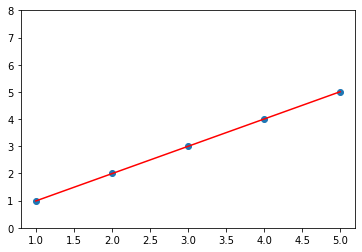

In [80]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

# 전체 코드

In [81]:
import tensorflow as tf

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

print("%6s%11s%10s%11s"%('i','W','d',"cost"))
print("-"*40)

# W, b update
for i in range(100): 
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

     i          W         d       cost
----------------------------------------
    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


처음에 우리는 W = 1, d = 0으로 예측을 하였다. 이때 예측한 값과 비교하여 실제 W, d가 어떻게 나타나는지 살펴보자.

W 값은 초기값으로 지정한 2.9부터 시작해서 2.4, 1.1...해서 쭉 1.0으로 수렴하고 있다. <br>
d 값은 초기값으로 지정한 0.5부터 시작해서 0.3, 0.003...에서 쭉 대략 0에 가까운 값으로 수렴하고 있다. <br>
결과에서 보이듯이 약간의 오차는 있지만 처음에 우리가 예측한 값에 수렴하고 있는 것을 확인할 수 있다.

cost를 확인해보자. 이때 cost는 작으면 작을수록 좋은 것이다. <br>
처음에는 cost가 45로 큰 값이 나타났지만 100번 이상 실행했을 시 거의 0에 가까운 값이 되었다.<br>
즉, cost가 줄어들었다는 것은 우리의 모델이 실제 데이터와 거의 유사하다는 것이다. 

수치적으로 결과를 살펴보았으니 이제 시각적으로 어떻게 변화가 일어나는지 살펴보겠다.

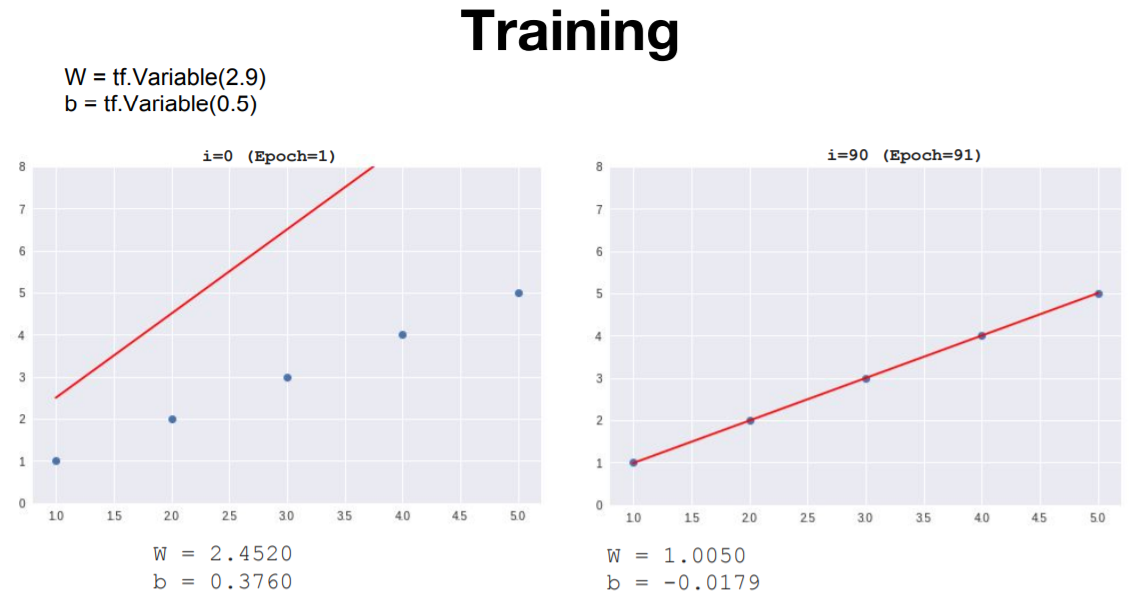

초기의 W, b값이 주어져있고 Epoch=1. 즉, 한번 돌았을 때 W, b값이 나타나있다. 
이때 빨간색 선이 우리의 모델이고 이 모델을 결정한 것이 W, b 값인 것이다.

Epoch를 늘려가면서 W, b를 지속적으로 업데이트를 해보면 W, b는 우리가 예측한 값에 수렴을 하였고 빨간색 선인 우리의 모델은 실제 값과 거의 유사한 곳에 위치하게 되었다. 

학습이 진행되기 전에는 W, b값이 임의의 랜덤한 값을 가져 그래프의 오차가 크지만 학습이 진행될 수록 실제 데이터와의 오차가 줄어드는 것을 시각적으로 확인할 수 있다. 

즉, **cost** 값이 0에 가까워지면서 우리의 모델이 실제 데이터와 유사해지는 것을 확인할 수 있다. 

# Predict

이제 새로운 W, b 값을 통해 예측을 해보자.

위에서 학습을 진행한 데이터는 input, output의 값이 같은  
x_data = [1, 2, 3, 4, 5]  
y_data = [1, 2, 3, 4, 5]   
해당 두 데이터이다.<br>

이제 새로운 데이터인 5, 2.5에 대해서도 입력한 값이 출력된 값과 같은지 확인해보자.

여기서 우리의 모델은 **H(x) = Wx + b**이다.
 

In [82]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


결과 값에서 보이듯이 새로운 데이터인 5를 입력하자 결과값으로 5.0066934으로 5에 근사한 값이 나왔다.
또한 2.5를 입력하자 결과값인 2.4946523으로 2.5에 근사한 값이 출력된 것을 확인할 수 있다.